--- Applying Different Classifiers and Evaluating Scores ---
Bernoulli: Accuracy=0.0300, F1-Score=0.0583


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest: Accuracy=0.0153, F1-Score=0.0583
Gaussian NB: Accuracy=0.0053, F1-Score=0.0126


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree: Accuracy=0.0147, F1-Score=0.0388
Multinomial NB: Accuracy=0.0000, F1-Score=0.0000


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNeighbors: Accuracy=0.0033, F1-Score=0.0007


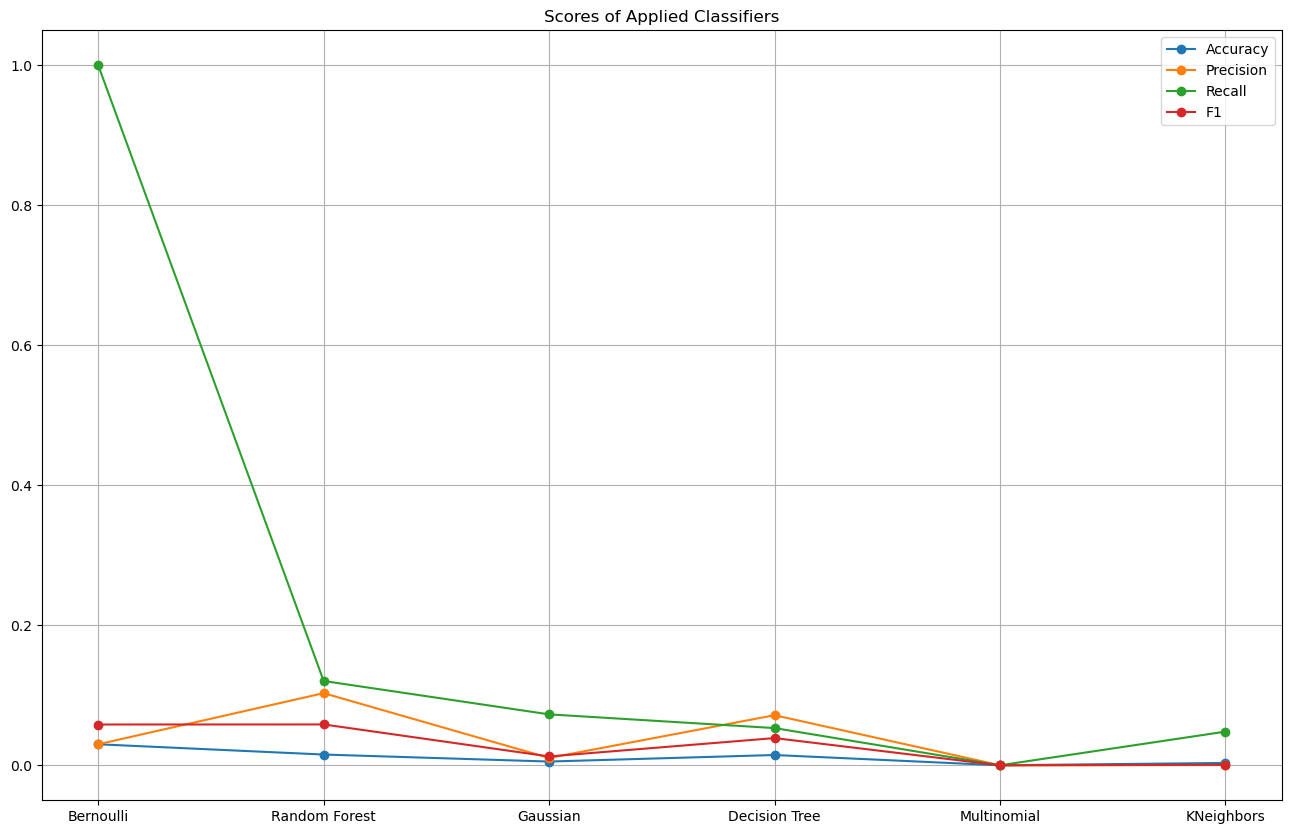

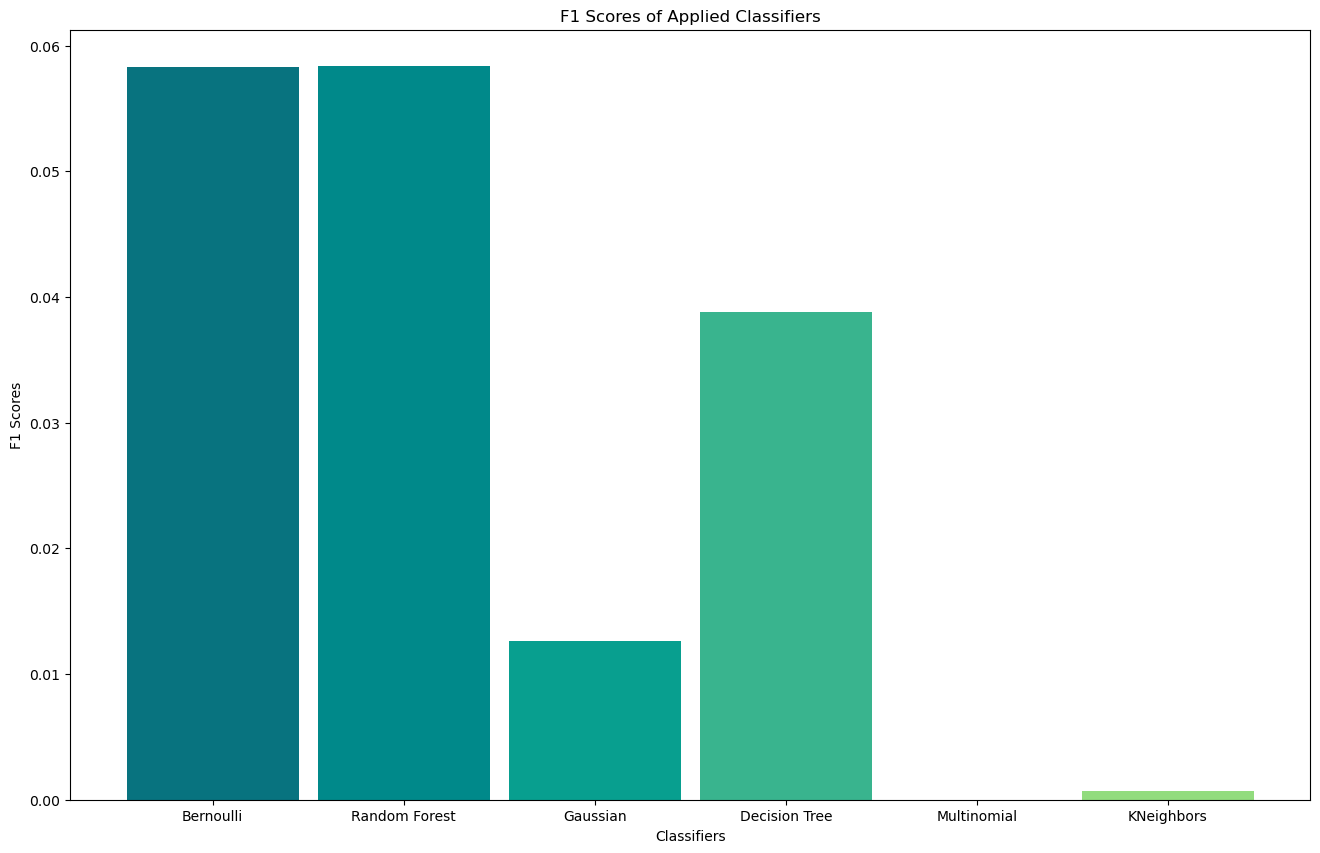

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =========================================================
# --- LAB 9 & LAB 10 INTEGRATION: Data Loading and Pre-processing ---
# =========================================================

# Data Loading
data_set = pd.read_csv('CrudeOil_Data.csv')

# Pre-processing: Dropping unnecessary columns (Example)
column_to_drop = 'id'
if column_to_drop in data_set.columns:
    data_set.drop(column_to_drop, axis=1, inplace=True)

# Pre-processing: Splitting into X (Features) and Y (Target)
X = data_set.iloc[:, 0:-1]
Y = data_set.iloc[:,-1]

# Pre-processing: Converting Object columns into Non-Negative Int (Factorize + 1)
cat_columns = X.select_dtypes(['object']).columns
if len(cat_columns) > 0:
    # Adding +1 to ensure all encoded values are non-negative (>= 0) for Naive Bayes
    X[cat_columns] = X[cat_columns].apply(lambda x: pd.factorize(x)[0] + 1)

# Pre-processing: Handling remaining NaNs by filling with 0
# MultinomialNB ko koi bhi NaN value nahi chahiye.
if X.isnull().any().any():
    X = X.fillna(0) # Saare remaining NaN values ko 0 se fill kar diya

# =========================================================
# --- LAB 11: Model Training, Evaluation, and Plotting ---
# =========================================================

# 1. Splitting Data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, shuffle=False)

# Variables to store results
classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("--- Applying Different Classifiers and Evaluating Scores ---")

## 2. Applying Classifiers

# a. Bernoulli Naive Bayes
BernNB = BernoulliNB()
BernNB.fit(X_train, Y_train)
Y_bpred = BernNB.predict(X_test)

b_accuracy = metrics.accuracy_score(Y_test, Y_bpred)
b_precision = metrics.precision_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_recall = metrics.recall_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_f1 = metrics.f1_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))

classifier_names.append('Bernoulli')
accuracy_scores.append(b_accuracy)
precision_scores.append(b_precision)
recall_scores.append(b_recall)
f1_scores.append(b_f1)
print(f"Bernoulli: Accuracy={b_accuracy:.4f}, F1-Score={b_f1:.4f}")

# b. Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_rpred = RF.predict(X_test)

r_accuracy = accuracy_score(Y_test, Y_rpred)
r_precision = metrics.precision_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_recall = metrics.recall_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_f1 = metrics.f1_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))

classifier_names.append('Random Forest')
accuracy_scores.append(r_accuracy)
precision_scores.append(r_precision)
recall_scores.append(r_recall)
f1_scores.append(r_f1)
print(f"Random Forest: Accuracy={r_accuracy:.4f}, F1-Score={r_f1:.4f}")

# c. Gaussian Naive Bayes
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
Y_gpred = GausNB.predict(X_test)

g_accuracy = accuracy_score(Y_test, Y_gpred)
g_precision = metrics.precision_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_recall = metrics.recall_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_f1 = metrics.f1_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))

classifier_names.append('Gaussian')
accuracy_scores.append(g_accuracy)
precision_scores.append(g_precision)
recall_scores.append(g_recall)
f1_scores.append(g_f1)
print(f"Gaussian NB: Accuracy={g_accuracy:.4f}, F1-Score={g_f1:.4f}")

# d. Decision Tree Classifier
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)
Y_dpred = Dtree.predict(X_test)

d_accuracy = accuracy_score(Y_test, Y_dpred)
d_precision = metrics.precision_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_recall = metrics.recall_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_f1 = metrics.f1_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))

classifier_names.append('Decision Tree')
accuracy_scores.append(d_accuracy)
precision_scores.append(d_precision)
recall_scores.append(d_recall)
f1_scores.append(d_f1)
print(f"Decision Tree: Accuracy={d_accuracy:.4f}, F1-Score={d_f1:.4f}")

# e. Multinomial Naive Bayes
MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
Y_mpred = MultiNB.predict(X_test)

m_accuracy = accuracy_score(Y_test, Y_mpred)
m_precision = metrics.precision_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_recall = metrics.recall_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_f1 = metrics.f1_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))

classifier_names.append('Multinomial')
accuracy_scores.append(m_accuracy)
precision_scores.append(m_precision)
recall_scores.append(m_recall)
f1_scores.append(m_f1)
print(f"Multinomial NB: Accuracy={m_accuracy:.4f}, F1-Score={m_f1:.4f}")

# f. K-Nearest Neighbors (KNN)
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
Y_kpred = KNN.predict(X_test)

k_accuracy = accuracy_score(Y_test, Y_kpred)
k_precision = metrics.precision_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_recall = metrics.recall_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_f1 = metrics.f1_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))

classifier_names.append('KNeighbors')
accuracy_scores.append(k_accuracy)
precision_scores.append(k_precision)
recall_scores.append(k_recall)
f1_scores.append(k_f1)
print(f"KNeighbors: Accuracy={k_accuracy:.4f}, F1-Score={k_f1:.4f}")

## 3. Plotting Results

# Line Graph (Showcasing all Scores)
plt.figure(figsize=(16, 10))

x_labels = np.array(classifier_names)
y_accuracy = np.array(accuracy_scores)
y_precision = np.array(precision_scores)
y_recall = np.array(recall_scores)
y_f1 = np.array(f1_scores)

# Plot 1: Accuracy
plt.plot(x_labels, y_accuracy, marker='o', label='Accuracy')
# Plot 2: Precision
plt.plot(x_labels, y_precision, marker='o', label='Precision')
# Plot 3: Recall
plt.plot(x_labels, y_recall, marker='o', label='Recall')
# Plot 4: F1 Score
plt.plot(x_labels, y_f1, marker='o', label='F1')

plt.title("Scores of Applied Classifiers")
plt.legend()
plt.grid(True)
plt.show()

# Bar Graph (Showcasing F1 Scores)
plt.figure(figsize=(16, 10))

left = [1, 2, 3, 4, 5, 6]
height = f1_scores
tick_label = classifier_names

# Plotting a bar chart
plt.bar(left, height, tick_label=tick_label, width=0.9, color = ['#08737f', '#00898a', '#089f8f', '#39b48e', '#64c987', '#92dc7e'])

# Labels and Title
plt.xlabel('Classifiers')
plt.ylabel('F1 Scores')
plt.title('F1 Scores of Applied Classifiers')

plt.show()

In [11]:
import pickle
# Assuming 'RF' is your trained RandomForestClassifier object from Lab 11
model_to_save = RF 

# Model ko 'best_oil_model.pkl' file mein save karna
with open('best_oil_model.pkl', 'wb') as file:
    pickle.dump(model_to_save, file)
print("Model successfully saved as best_oil_model.pkl.")

Model successfully saved as best_oil_model.pkl.
